In [1]:
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import webtext
from nltk.corpus import nps_chat
from nltk.corpus import brown
from nltk.corpus import reuters
from nltk.corpus import inaugural
from nltk.corpus import udhr
from nltk.corpus import stopwords
from nltk.corpus import names
from nltk.corpus import cmudict
from nltk.corpus import swadesh
from nltk.corpus import toolbox
from nltk.corpus import wordnet

# Accessing Text Corpora and Lexical Resources

## Accessing Text Corpora

### Gutenberg Corpus

In [2]:
gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [3]:
emma = gutenberg.words('austen-emma.txt')

In [4]:
len(emma)

192427

In [5]:
emma_t = nltk.Text(gutenberg.words('austen-emma.txt'))

In [6]:
emma_t.concordance('surprize')

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [7]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print int(num_chars/num_words), int(num_words/num_sents), int(num_words/num_vocab), fileid

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


In [8]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[[u'[', u'The', u'Tragedie', u'of', u'Macbeth', u'by', u'William', u'Shakespeare', u'1603', u']'], [u'Actus', u'Primus', u'.'], ...]

In [9]:
macbeth_sentences[1037]

[u'Good',
 u'night',
 u',',
 u'and',
 u'better',
 u'health',
 u'Attend',
 u'his',
 u'Maiesty']

In [10]:
longest_len = max([len(s) for s in macbeth_sentences])
print ' '.join([s for s in macbeth_sentences if len(s) == longest_len][0])

Doubtfull it stood , As two spent Swimmers , that doe cling together , And choake their Art : The mercilesse Macdonwald ( Worthie to be a Rebell , for to that The multiplying Villanies of Nature Doe swarme vpon him ) from the Westerne Isles Of Kernes and Gallowgrosses is supply ' d , And Fortune on his damned Quarry smiling , Shew ' d like a Rebells Whore : but all ' s too weake : For braue Macbeth ( well hee deserues that Name ) Disdayning Fortune , with his brandisht Steele , Which smoak ' d with bloody execution ( Like Valours Minion ) caru ' d out his passage , Till hee fac ' d the Slaue : Which neu ' r shooke hands , nor bad farwell to him , Till he vnseam ' d him from the Naue toth ' Chops , And fix ' d his Head vpon our Battlements


### Web and Chat Text

In [11]:
for fileid in webtext.fileids():
    print fileid, webtext.raw(fileid)[:70], '...'

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to set fut ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl: Yea ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terry Ros ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encounters. ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawberrie ...


In [12]:
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

[u'i',
 u'do',
 u"n't",
 u'want',
 u'hot',
 u'pics',
 u'of',
 u'a',
 u'female',
 u',',
 u'I',
 u'can',
 u'look',
 u'in',
 u'a',
 u'mirror',
 u'.']

### Brown Corpus

In [13]:
brown.categories()

[u'adventure',
 u'belles_lettres',
 u'editorial',
 u'fiction',
 u'government',
 u'hobbies',
 u'humor',
 u'learned',
 u'lore',
 u'mystery',
 u'news',
 u'religion',
 u'reviews',
 u'romance',
 u'science_fiction']

In [14]:
brown.words(categories='news')

[u'The', u'Fulton', u'County', u'Grand', u'Jury', ...]

In [15]:
brown.words(fileids=['cg22'])

[u'Does', u'our', u'society', u'have', u'a', ...]

In [16]:
print ' '.join(brown.sents(categories=['news', 'editorial', 'reviews'])[0])

The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .


In [17]:
cfd = nltk.ConditionalFreqDist(
        (genre, word)
        for genre in brown.categories()
        for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


### Reuters Corpus

In [18]:
reuters.fileids()[:5]

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']

In [19]:
reuters.categories()[:10]

[u'acq',
 u'alum',
 u'barley',
 u'bop',
 u'carcass',
 u'castor-oil',
 u'cocoa',
 u'coconut',
 u'coconut-oil',
 u'coffee']

In [20]:
reuters.categories('training/9865')

[u'barley', u'corn', u'grain', u'wheat']

In [21]:
reuters.categories(['training/9865', 'training/9880'])

[u'barley', u'corn', u'grain', u'money-fx', u'wheat']

In [22]:
reuters.fileids('barley')[:5]

[u'test/15618', u'test/15649', u'test/15676', u'test/15728', u'test/15871']

In [23]:
reuters.fileids(['barley', 'corn'])[:5]

[u'test/14832', u'test/14858', u'test/15033', u'test/15043', u'test/15106']

In [24]:
reuters.words('training/9865')[:10]

[u'FRENCH',
 u'FREE',
 u'MARKET',
 u'CEREAL',
 u'EXPORT',
 u'BIDS',
 u'DETAILED',
 u'French',
 u'operators',
 u'have']

### Inaugural Address Corpus

In [25]:
inaugural.fileids()[:5]

[u'1789-Washington.txt',
 u'1793-Washington.txt',
 u'1797-Adams.txt',
 u'1801-Jefferson.txt',
 u'1805-Jefferson.txt']

In [26]:
[fileid[:4] for fileid in inaugural.fileids()[:5]]

[u'1789', u'1793', u'1797', u'1801', u'1805']

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


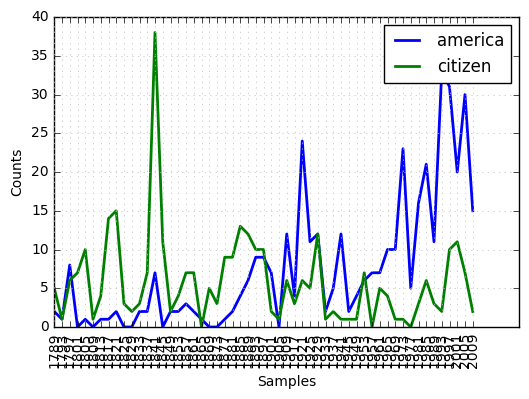

In [27]:
cfd = nltk.ConditionalFreqDist(
        (target, fileid[:4])
        for fileid in inaugural.fileids()
        for w in inaugural.words(fileid)
        for target in ['america', 'citizen']
        if w.lower().startswith(target))
cfd.plot()

## Conditional Frequency Distributions

### Counting Words by Genre

In [28]:
genre_word = [(genre, word)
              for genre in ['news', 'romance']
              for word in brown.words(categories=genre)]
print genre_word[:4]
print genre_word[-4:]

[('news', u'The'), ('news', u'Fulton'), ('news', u'County'), ('news', u'Grand')]
[('romance', u'afraid'), ('romance', u'not'), ('romance', u"''"), ('romance', u'.')]


In [29]:
cfd = nltk.ConditionalFreqDist(genre_word)

In [30]:
cfd.conditions()

['romance', 'news']

### Plotting and Tabulating Distributions

In [31]:
cfd = nltk.ConditionalFreqDist(
        (target, fileid[:4])
        for fileid in inaugural.fileids()
        for w in inaugural.words(fileid)
        for target in ['america', 'citizen']
        if w.lower().startswith(target))

In [32]:
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
        (lang, len(word))
        for lang in languages
        for word in udhr.words(lang + '-Latin1'))

In [33]:
cfd.tabulate(conditions=['English', 'German_Deutsch'], samples=range(10), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


### Generating Random Text with Bigrams

In [34]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
for b in nltk.bigrams(sent):
    print b

('In', 'the')
('the', 'beginning')
('beginning', 'God')
('God', 'created')
('created', 'the')
('the', 'heaven')
('heaven', 'and')
('and', 'the')
('the', 'earth')
('earth', '.')


In [35]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print word,
        word = cfdist[word].max()
        
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

print cfd['living']

generate_model(cfd, 'living')

<FreqDist with 6 samples and 16 outcomes>
living creature that he said , and the land of the land of the land


In [36]:
cfd.conditions()[:5]

[u'alo', u'Leah', u'Night', u'Matred', u'four']

In [37]:
cfd['living']

FreqDist({u',': 1,
          u'.': 1,
          u'creature': 7,
          u'soul': 1,
          u'substance': 2,
          u'thing': 4})

In [38]:
cfd['living']['creature']

7

## Lexical Resources

### Wordlist Corpora

In [39]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

In [40]:
unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:5]

[u'abbeyland', u'abhorred', u'abilities', u'abounded', u'abridgement']

In [41]:
unusual_words(nltk.corpus.nps_chat.words())[:5]

[u'aaaaaaaaaaaaaaaaa', u'aaahhhh', u'abortions', u'abou', u'abourted']

In [42]:
stopwords.words('english')[:5]

[u'i', u'me', u'my', u'myself', u'we']

In [43]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return 1.0 * len(content) / len(text)

In [44]:
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

In [45]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6 and obligatory in w and nltk.FreqDist(w) <= puzzle_letters][:5]

[u'glover', u'gorlin', u'govern', u'grovel', u'ignore']

In [46]:
names.fileids()

[u'female.txt', u'male.txt']

In [47]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names][:5]

[u'Abbey', u'Abbie', u'Abby', u'Addie', u'Adrian']

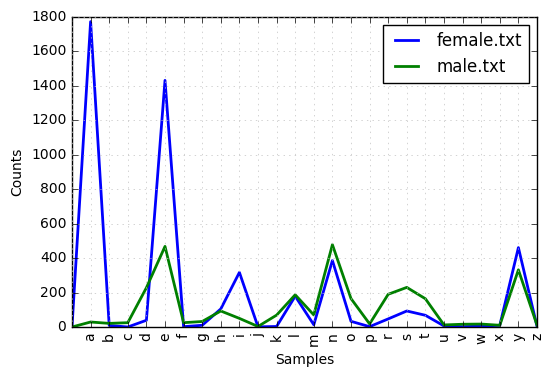

In [48]:
cfd = nltk.ConditionalFreqDist(
        (fileid, name[-1])
        for fileid in names.fileids()
        for name in names.words(fileid))
cfd.plot()

### A Pronouncing dictionary

In [49]:
entries = cmudict.entries()
len(entries)

133737

In [50]:
for entry in entries[39943:39951]:
    print entry

(u'explorer', [u'IH0', u'K', u'S', u'P', u'L', u'AO1', u'R', u'ER0'])
(u'explorers', [u'IH0', u'K', u'S', u'P', u'L', u'AO1', u'R', u'ER0', u'Z'])
(u'explores', [u'IH0', u'K', u'S', u'P', u'L', u'AO1', u'R', u'Z'])
(u'exploring', [u'IH0', u'K', u'S', u'P', u'L', u'AO1', u'R', u'IH0', u'NG'])
(u'explosion', [u'IH0', u'K', u'S', u'P', u'L', u'OW1', u'ZH', u'AH0', u'N'])
(u'explosions', [u'IH0', u'K', u'S', u'P', u'L', u'OW1', u'ZH', u'AH0', u'N', u'Z'])
(u'explosive', [u'IH0', u'K', u'S', u'P', u'L', u'OW1', u'S', u'IH0', u'V'])
(u'explosively', [u'EH2', u'K', u'S', u'P', u'L', u'OW1', u'S', u'IH0', u'V', u'L', u'IY0'])


In [51]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron
        if ph1 == 'P' and ph3 == 'T':
            print word, ph2,

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1


In [52]:
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable][:5]

[u"atlantic's", u'audiotronics', u'avionics', u'beatniks', u'calisthenics']

In [53]:
[w for w, pron in entries if pron[-1] == 'M' and w[-1] == 'n']

[u'autumn', u'column', u'condemn', u'damn', u'goddamn', u'hymn', u'solemn']

In [54]:
sorted(set(w[:2] for w, pron in entries if pron[0] == 'N' and w[0] != 'n'))

[u'gn', u'kn', u'mn', u'pn']

In [55]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']][:5]

[u'abbreviated',
 u'abbreviated',
 u'abbreviating',
 u'accelerated',
 u'accelerating']

In [56]:
[w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']][:5]

[u'abbreviation',
 u'abbreviations',
 u'abomination',
 u'abortifacient',
 u'abortifacients']

In [57]:
p3 = [(pron[0]+'-'+pron[2], word)
          for (word, pron) in entries
          if pron[0] == 'P' and len(pron) == 3]

cfd = nltk.ConditionalFreqDist(p3)

for template in cfd.conditions():
    if len(cfd[template]) > 10:
        words = cfd[template].keys()
        wordlist = ' '.join(words)
        print template, wordlist[:70] + "..."

P-T pot puett pit pete putt pat purt pet peart pott pett pait pert pote pa...
P-P pap paap pipp paup pape pup pep poop pop pipe paape popp pip peep pope...
P-R paar poor par poore pear pare pour peer pore parr por pair porr pier...
P-S pearse piece posts pasts peace perce pos pers pace puss pesce pass pur...
P-Z pays p.s pao's pais paws p.'s pas pez paz pei's pose poise peas paiz p...
P-L pil poehl pille pehl pol pall pohl pahl paul perl pale paille perle po...
P-N paine payne pon pain pin pawn pinn pun pine paign pen pyne pane penn p...
P-K pik peek pic pique paque polk perc poke perk pac pock poch purk pak pa...
P-UW1 plew pshew plue peugh pew pru pugh peru prugh prue prew...
P-CH perch puche poche peach petsche poach pietsch pautsch piche petsch poo...


In [58]:
prondict = nltk.corpus.cmudict.dict()
prondict['fire']

[[u'F', u'AY1', u'ER0'], [u'F', u'AY1', u'R']]

In [59]:
text = ['natural', 'language', 'processing']
print ' '.join([ph for w in text for ph in prondict[w][0]])

N AE1 CH ER0 AH0 L L AE1 NG G W AH0 JH P R AA1 S EH0 S IH0 NG


### Comparative Wordlists

In [60]:
swadesh.fileids()[:5]

[u'be', u'bg', u'bs', u'ca', u'cs']

In [61]:
swadesh.words('en')[:5]

[u'I', u'you (singular), thou', u'he', u'we', u'you (plural)']

In [62]:
fr2en = swadesh.entries(['fr', 'en'])
fr2en[:5]

[(u'je', u'I'),
 (u'tu, vous', u'you (singular), thou'),
 (u'il', u'he'),
 (u'nous', u'we'),
 (u'vous', u'you (plural)')]

In [63]:
translate = dict(fr2en)
translate['chien']

u'dog'

In [64]:
de2en = swadesh.entries(['de', 'en'])
es2en = swadesh.entries(['es', 'en'])
translate.update(dict(de2en))
translate.update(dict(es2en))
translate['Hund']

u'dog'

In [65]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]:
    print swadesh.entries(languages)[i]

(u'say', u'sagen', u'zeggen', u'decir', u'dire', u'dizer', u'dicere')
(u'sing', u'singen', u'zingen', u'cantar', u'chanter', u'cantar', u'canere')
(u'play', u'spielen', u'spelen', u'jugar', u'jouer', u'jogar, brincar', u'ludere')
(u'float', u'schweben', u'zweven', u'flotar', u'flotter', u'flutuar, boiar', u'fluctuare')


### Shoebox and Toolbox Lexicons

In [66]:
toolbox.entries('rotokas.dic')[:1]

[(u'kaa',
  [(u'ps', u'V'),
   (u'pt', u'A'),
   (u'ge', u'gag'),
   (u'tkp', u'nek i pas'),
   (u'dcsv', u'true'),
   (u'vx', u'1'),
   (u'sc', u'???'),
   (u'dt', u'29/Oct/2005'),
   (u'ex', u'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   (u'xp', u'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   (u'xe', u'Apoka is gagging from food while talking.')])]

## WordNet

### Senses and Synonyms

In [67]:
wordnet.synsets('motorcar')

[Synset('car.n.01')]

In [68]:
wordnet.synset('car.n.01').lemma_names()

[u'car', u'auto', u'automobile', u'machine', u'motorcar']

In [69]:
wordnet.synset('car.n.01').definition()

u'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [70]:
wordnet.synset('car.n.01').examples()

[u'he needs a car to get to work']

In [71]:
wordnet.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [72]:
wordnet.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [73]:
wordnet.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [74]:
wordnet.lemma('car.n.01.automobile').name()

u'automobile'

In [75]:
wordnet.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [76]:
for synset in wordnet.synsets('car'):
    print synset.lemma_names()

[u'car', u'auto', u'automobile', u'machine', u'motorcar']
[u'car', u'railcar', u'railway_car', u'railroad_car']
[u'car', u'gondola']
[u'car', u'elevator_car']
[u'cable_car', u'car']


In [77]:
wordnet.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

### The WordNet Hierarchy

In [78]:
motorcar = wordnet.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[26]

Synset('stanley_steamer.n.01')

In [79]:
sorted([lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas()])[:5]

[u'Model_T', u'S.U.V.', u'SUV', u'Stanley_Steamer', u'ambulance']

### More Lexical Relations

In [80]:
wordnet.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [81]:
wordnet.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [82]:
wordnet.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [83]:
for synset in wordnet.synsets('mint', wordnet.NOUN):
    print synset.name() + ':', synset.definition()

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [84]:
wordnet.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [85]:
wordnet.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

In [86]:
wordnet.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [87]:
wordnet.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [88]:
wordnet.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

In [89]:
wordnet.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [90]:
wordnet.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [91]:
wordnet.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('inclined.a.02.inclined'), Lemma('vertical.a.01.vertical')]

In [92]:
wordnet.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

### Semantic Similarity

In [93]:
right = wordnet.synset('right_whale.n.01')
orca = wordnet.synset('orca.n.01')
minke = wordnet.synset('minke_whale.n.01')
tortoise = wordnet.synset('tortoise.n.01')
novel = wordnet.synset('novel.n.01')
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [94]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [95]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [96]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

In [97]:
wordnet.synset('baleen_whale.n.01').min_depth()

14

In [98]:
wordnet.synset('whale.n.02').min_depth()

13

In [99]:
wordnet.synset('vertebrate.n.01').min_depth()

8

In [100]:
wordnet.synset('entity.n.01').min_depth()

0

In [101]:
right.path_similarity(minke)

0.25

In [102]:
right.path_similarity(orca)

0.16666666666666666

In [103]:
right.path_similarity(tortoise)

0.07692307692307693

In [104]:
right.path_similarity(novel)

0.043478260869565216